🔧 A. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


📁 B. Create Folder Structure in Drive

In [ ]:
import os

# Define root project path
project_root = "/content/drive/My Drive/earthquake-prediction-ml"

# Define folders to create
folders = [
    "data/raw",
    "data/processed",
    "notebooks",
    "models/saved_models",
    "src",
    "results/figures",
    "results/metrics"
]

# Create folders
for folder in folders:
    path = os.path.join(project_root, folder)
    os.makedirs(path, exist_ok=True)

print("Project structure created at:", project_root)


Project structure created at: /content/drive/My Drive/earthquake-prediction-ml


#✅ Step 1: Data Collection & Loading

✅  Load Dataset in Colab

In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the CSV file


Saving Earthquake_Data.csv to Earthquake_Data.csv


In [ ]:
import shutil

shutil.move("Earthquake_Data.csv", "/content/drive/My Drive/earthquake-prediction-ml/data/raw/Earthquake_Data.csv")


'/content/drive/My Drive/earthquake-prediction-ml/data/raw/Earthquake_Data.csv'

In [ ]:
import pandas as pd

# Path to raw data
data_path = "/content/drive/My Drive/earthquake-prediction-ml/data/raw/Earthquake_Data.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Show top rows
df.head()


,Date(YYYY/MM/DD) Time Latitude Longitude Depth Mag Magt Nst Gap Clo RMS SRC EventID
0,1966/07/01 09:41:21.82 35.9463 -120.4700 12....
1,1966/07/02 12:08:34.25 35.7867 -120.3265 8....
2,1966/07/02 12:16:14.95 35.7928 -120.3353 9....
3,1966/07/02 12:25:06.12 35.7970 -120.3282 9....
4,1966/07/05 18:54:54.36 35.9223 -120.4585 7....


In [ ]:
# Clean up column names by stripping whitespace
df.columns = df.columns.str.strip()

# Check again
print(df.columns)


Index(['Date(YYYY/MM/DD)    Time           Latitude        Longitude           Depth       Mag      Magt     Nst    Gap     Clo     RMS    SRC     EventID'], dtype='object')


# ✅ Step 2: Exploratory Data Analysis (EDA) 🔍

🔧 A. Basic Info and Summary

In [ ]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18030 entries, 0 to 18029
Data columns (total 1 columns):
 #   Column                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                              --------------  ----- 
 0   Date(YYYY/MM/DD)    Time           Latitude        Longitude           Depth       Mag      Magt     Nst    Gap     Clo     RMS    SRC     EventID  18030 non-null  object
dtypes: object(1)
memory usage: 141.0+ KB


,0
Date(YYYY/MM/DD) Time Latitude Longitude Depth Mag Magt Nst Gap Clo RMS SRC EventID,0


📊 B. Visualize Distributions

In [ ]:
import pandas as pd

# Load the data with flexible space separator
df = pd.read_csv("Earthquake_Data.csv", sep=r"\s{2,}", engine='python')

# Clean column names
df.columns = df.columns.str.strip()

# Show fixed column names
print(df.columns)
df.head()


Index(['Date(YYYY/MM/DD)', 'Time', 'Latitude', 'Longitude', 'Depth', 'Mag',
       'Magt', 'Nst', 'Gap', 'Clo', 'RMS', 'SRC', 'EventID'],
      dtype='object')


,Date(YYYY/MM/DD),Time,Latitude,Longitude,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,EventID
0,1966/07/01 09:41:21.82,35.9463 -120.4700,12.26,3.20,Mx,7 171,20 0.02 NCSN,-4540462,NaN,NaN,NaN,NaN,NaN
1,1966/07/02 12:08:34.25,35.7867 -120.3265,8.99,3.70,Mx,8,86,3 0.04 NCSN,-4540520.0,NaN,NaN,NaN,NaN
2,1966/07/02 12:16:14.95,35.7928 -120.3353,9.88,3.40,Mx,8,89,2 0.03 NCSN,-4540521.0,NaN,NaN,NaN,NaN
3,1966/07/02 12:25:06.12,35.7970 -120.3282,9.09,3.10,Mx,8 101,3 0.08 NCSN,-4540522,NaN,NaN,NaN,NaN,NaN
4,1966/07/05 18:54:54.36,35.9223 -120.4585,7.86,3.10,Mx,9 161,14 0.04 NCSN,-4540594,NaN,NaN,NaN,NaN,NaN


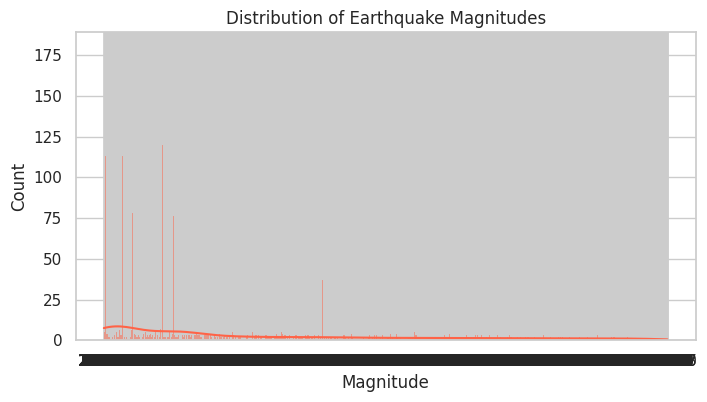

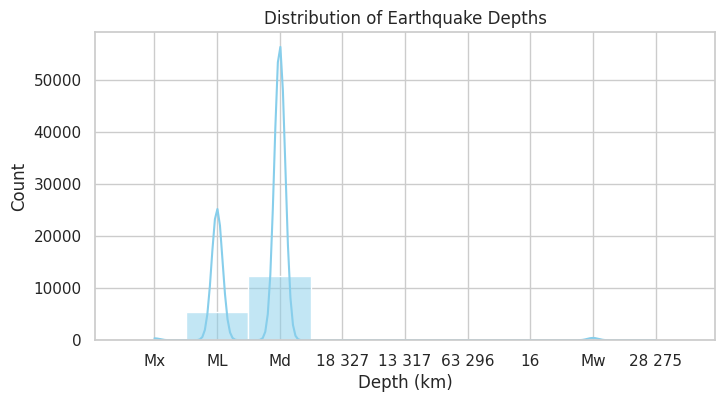

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Magnitude distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Mag'], bins=30, kde=True, color='tomato')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

# Depth distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Depth'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Earthquake Depths")
plt.xlabel("Depth (km)")
plt.ylabel("Count")
plt.show()


#✅ Step 3: Data Preprocessing & Feature Engineering 🔧💡

Clean any missing or inconsistent values

Convert date/time into useful features

Select the relevant columns for prediction



🔹 A. Check for Missing Values

In [ ]:
# Check missing values
df.isnull().sum()


,0
Date(YYYY/MM/DD),0
Time,0
Latitude,0
Longitude,0
Depth,0
Mag,0
Magt,0
Nst,4
Gap,10438
Clo,18030


🔹 B. Convert Date and Time

In [ ]:
# Rename column for easier access
df = df.rename(columns={'Date(YYYY/MM/DD)': 'Date'})

# Combine Date and Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Extract useful features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour


<ipython-input-44-1f0d8df1330b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


🔹 C. Drop Unnecessary Columns

In [ ]:
df = df[['Latitude', 'Longitude', 'Depth', 'Mag', 'Year', 'Month', 'Day', 'Hour']]



🔹 D. Handle Missing or Bad Data

In [ ]:
df = df.dropna()


In [ ]:
# check for outlier
# Check if any values are out of realistic bounds
print(df[df['Mag'] > 10])  # Earthquakes rarely go above 9.5


Empty DataFrame
Columns: [Latitude, Longitude, Depth, Mag, Year, Month, Day, Hour]
Index: []


# ✅ Step 4: Model Building & Training 🤖⚙️

 going to build ML models to predict earthquake magnitude based on the features like location, depth, and time.

🔍 A. Choose Target and Features

In [ ]:
# Features (X) and Target (y)
X = df.drop(columns=['Mag'])  # All except magnitude
y = df['Mag']                 # Target: Magnitude


🔪 B. Train-Test Split

In [ ]:
#Re-import and manually split the columns
import pandas as pd

# Step 1: Read raw lines
with open("/content/Earthquake_Data.csv", "r") as f:
    lines = f.readlines()

# Step 2: Manually split header and data
header = lines[0].strip().split()
data = [line.strip().split() for line in lines[1:] if line.strip()]

# Step 3: Create dataframe
df = pd.DataFrame(data, columns=header)

# Step 4: Convert columns to numeric types where needed
cols_to_convert = ['Latitude', 'Longitude', 'Depth', 'Mag']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 5: Drop rows with NaNs
df = df.dropna()

# Step 6: Add datetime features
df['Year'] = pd.to_datetime(df['Date(YYYY/MM/DD)'], errors='coerce').dt.year
df['Month'] = pd.to_datetime(df['Date(YYYY/MM/DD)'], errors='coerce').dt.month
df['Day'] = pd.to_datetime(df['Date(YYYY/MM/DD)'], errors='coerce').dt.day
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Step 7: Final columns
df = df[['Latitude', 'Longitude', 'Depth', 'Mag', 'Year', 'Month', 'Day', 'Hour']]
print(df.head())
print("Shape:", df.shape)


<ipython-input-67-03ba54bd7f88>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


   Latitude  Longitude  Depth  Mag  Year  Month  Day  Hour
0   35.9463  -120.4700  12.26  3.2  1966      7    1     9
1   35.7867  -120.3265   8.99  3.7  1966      7    2    12
2   35.7928  -120.3353   9.88  3.4  1966      7    2    12
3   35.7970  -120.3282   9.09  3.1  1966      7    2    12
4   35.9223  -120.4585   7.86  3.1  1966      7    5    18
Shape: (18030, 8)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Mag'])
y = df['Mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(14424, 7) (3606, 7)


#✅ Step 5: Model Training & Evaluation

train two models for comparison:

Linear Regression (baseline)

Random Forest Regressor (stronger non-linear model)

🔹 Train Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

🔹 Evaluate Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}\n")

# Evaluate both models
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


--- Linear Regression ---
MAE: 0.3180
MSE: 0.1807
R² Score: 0.0072

--- Random Forest ---
MAE: 0.3117
MSE: 0.1730
R² Score: 0.0493



# ✅ Step 6: Visualize Predictions

 plot actual vs. predicted values to understand how the model is doing.

🔹 Scatter Plot of Predictions

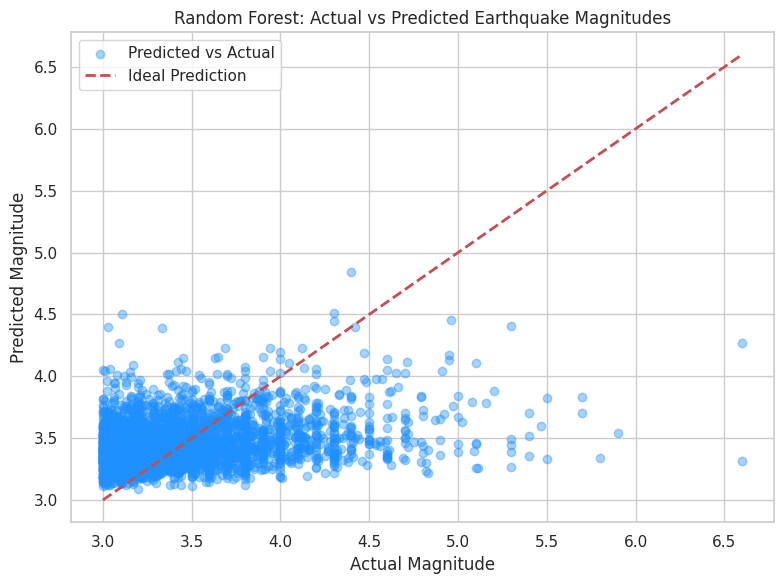

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions vs actual for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='dodgerblue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Prediction")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Random Forest: Actual vs Predicted Earthquake Magnitudes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 Residual Plot (optional but helpful)

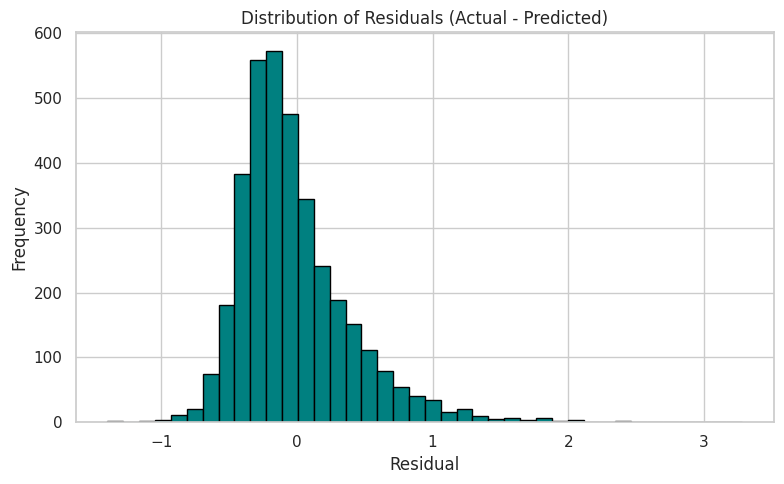

In [ ]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=40, color="teal", edgecolor="black")
plt.title("Distribution of Residuals (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ Step 7: Feature Importance (for Random Forest)

This tells us which features contribute most to the model’s predictions. Super useful for understanding the data & improving the model.

🔹 Code: Plot Feature Importances

<ipython-input-81-ca61c77752cc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


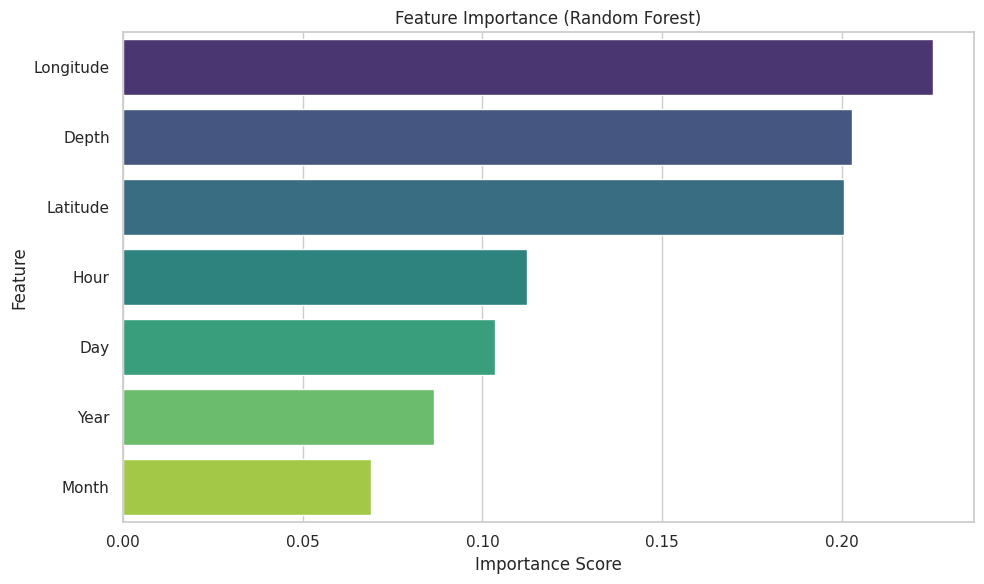

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming feat_imp_df is already created
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

# ✅ Save the plot
plt.savefig("feature_importance.png")
plt.show()


In [ ]:
#Then, to move it into your organized project structure in Google Drive:
import shutil

shutil.move("feature_importance.png", "/content/drive/MyDrive/earthquake-prediction-ml/visuals/")


'/content/drive/MyDrive/earthquake-prediction-ml/visuals/feature_importance.png'

# ✅ Step 8: Save the Model for Deployment

🔹 Code: Save the model using joblib

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "random_forest_earthquake_model.pkl")

# Save your preprocessing features if needed
joblib.dump(X.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']

🔹 To Load Later:

In [ ]:
# Load the model
loaded_model = joblib.load("random_forest_earthquake_model.pkl")

# Use it for prediction
sample_input = X_test.iloc[0:1]
prediction = loaded_model.predict(sample_input)
print("Predicted Magnitude:", prediction)


Predicted Magnitude: [3.28]


# ✅ Step 9: Organize Project Files and Structure

In [ ]:
#code to create the folders
import os

folders = [
    "data/raw",
    "data/processed",
    "models",
    "notebooks",
    "utils",
    "visuals"
]

for folder in folders:
    os.makedirs(f"/content/drive/MyDrive/earthquake-prediction-ml/{folder}", exist_ok=True)

print("Project folders created successfully!")


Project folders created successfully!


In [ ]:
#🔹 Save the model
import joblib

joblib.dump(rf_model, "random_forest_earthquake_model.pkl")


['random_forest_earthquake_model.pkl']

In [ ]:
#🔹 Save the plot
plt.savefig("feature_importance.png")


<Figure size 640x480 with 0 Axes>

In [ ]:
import shutil

# Copy model file
shutil.copy("random_forest_earthquake_model.pkl", "/content/drive/MyDrive/earthquake-prediction-ml/models/")

# Copy plot
shutil.copy("feature_importance.png", "/content/drive/MyDrive/earthquake-prediction-ml/visuals/")


'/content/drive/MyDrive/earthquake-prediction-ml/visuals/feature_importance.png'

In [ ]:
!ls "/content/drive/MyDrive/earthquake-prediction-ml/models/"
!ls "/content/drive/MyDrive/earthquake-prediction-ml/visuals/"


random_forest_earthquake_model.pkl  random_forest_model_v2.pkl	saved_models
feature_importance.png


In [ ]:
from google.colab import files

# Download model file
files.download("random_forest_earthquake_model.pkl")

# Optional: download visual
files.download("feature_importance.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>